<a href="https://colab.research.google.com/github/Hyeonji1234/IPcolab/blob/main/ch09_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


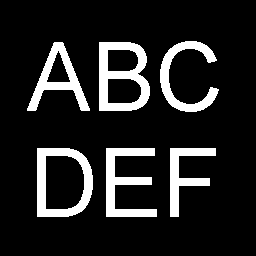

In [2]:
img = cv2.imread('/content/gdrive/My Drive/digital/Images/abcdef.bmp')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(img)

In [3]:
numLabels, labels = cv2.connectedComponents(gimg)
print(numLabels)

7


In [4]:
print(labels.shape)
print(labels)

(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


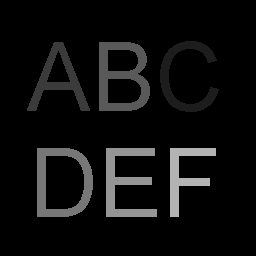

In [5]:
label_H = np.uint8(labels * 179 / np.max(labels))
cv2_imshow(label_H)

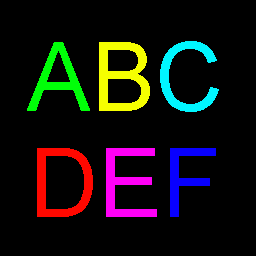

In [7]:
bank = 255 * np.ones_like(label_H)
labelimg = cv2.merge([label_H, bank, bank])
labelimg = cv2.cvtColor(labelimg, cv2.COLOR_HSV2RGB)
labelimg[label_H == 0] = 0
cv2_imshow(labelimg)

(256, 256, 3)


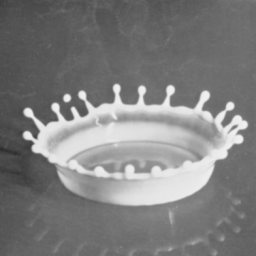

In [8]:
img = cv2.imread('/content/gdrive/My Drive/digital/Images/milkdrop.bmp')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(img)

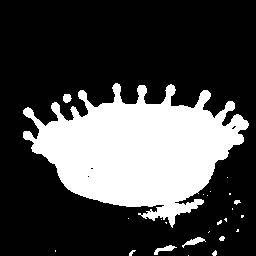

In [10]:
ret, thresh = cv2.threshold(gimg, 127, 255, 0)
cv2_imshow(thresh)

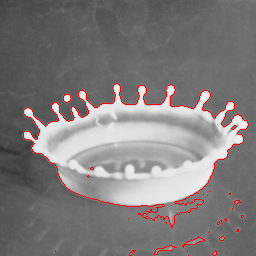

In [13]:
contour, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img = cv2.drawContours(img, contour, -1, (0, 0, 255), 1)
cv2_imshow(img)